# Application of Decision Tree Classification Technique on a Marketing Dataset

One of the main applications of classification is marketing. Sometimes the product a company is advertising is not suitable for all people. For example, a person between the ages of 20 and 25 may like to spend more on smartphone covers than a person between the ages of 40 and 45. Likewise, a high-income person can afford to spend more on luxury goods than a low-income person. A business that wants to advertise a product likes to know which user will buy the product. This could be really helpful for the company selling their products. Predicting if a user is a potential customer or not is a classification problem.

In this Machine Learning Analysis the Decision Algorithm classification technique will be applied to predict if a user can be a potential customer (will buy the advertised product) based on his/her attributes available in the dtatset e.g. age, gender, estimated salary and whether they purchased the product.

In [12]:
#Importing the required libraries

import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset['Gender'] = dataset['Gender'].replace(['Male', 'Female'], [0,1])
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [13]:
# Seprating the columns into the independent and dependent variables/attributes

x = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values

In [14]:
#We divide out dataset into training and test by leveraging the model_selection module of sklearn
#Here we are taking out 30% of your datatset to test the trained dataset. ergo 70% for training


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0)

# The random state hyperparameter in the train_test_split() function controls the shuffling process. 
# With random_state=None, we get different train and test sets across different executions. 
# If a fixed value is assigned to it like random_state=0, we get the same train and test sets across different executions.



In [15]:
#Fitting Decision Tree to the Dataset

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
#Predicting our Y with the Test dataset

y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [10]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [17]:
#Evaluating the performance metrics

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
result = metrics.classification_report(y_test, y_pred)

print("Accuracy is ", round(accuracy,2), " % \n\n")#
print("Confusion Matrix \n", cm, "\n\n")
print("Classification Report \n", result)

Accuracy is  0.91  % 


Confusion Matrix 
 [[71  8]
 [ 3 38]] 


Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        79
           1       0.83      0.93      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



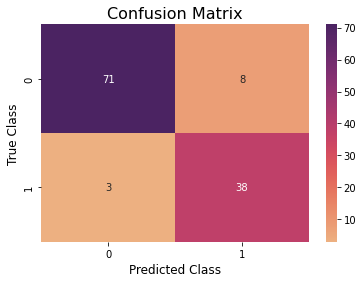

In [18]:
ax = sns.heatmap(cm, cmap='flare', annot = True, fmt = 'd')
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

From the Test Dataset, 
of all the people that purchased the product the model predicted 93% correctly. Recall / Sensitivity
of all the people that did not purchase the product the model predicted 90% correctly. Specificity

Also,
of all the people the model predicted to purchase the product, 83% were correctly predicted.
of all the people the model predicted not to purchase the product, 96% were correctly predicted.

The overall accuracy of the model was 91%.

